# <font color=red>Data Preprocessing</font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [6]:
leafdata = pd.read_csv('leaf.csv')
leafdata.head(10)

1  1.1  0.72694  1.4742  0.32396  0.98535      1.2  0.83592  0.0046566  \
0  1    2  0.74173  1.5257  0.36116  0.98152  0.99825  0.79867   0.005242   
1  1    3  0.76722  1.5725  0.38998  0.97755  1.00000  0.80812   0.007457   
2  1    4  0.73797  1.4597  0.35376  0.97566  1.00000  0.81697   0.006877   
3  1    5  0.82301  1.7707  0.44462  0.97698  1.00000  0.75493   0.007428   
4  1    6  0.72997  1.4892  0.34284  0.98755  1.00000  0.84482   0.004945   
5  1    7  0.82063  1.7529  0.44458  0.97964  0.99649  0.76770   0.005928   
6  1    8  0.77982  1.6215  0.39222  0.98512  0.99825  0.80816   0.005099   
7  1    9  0.83089  1.8199  0.45693  0.98240  1.00000  0.77106   0.006005   
8  1   10  0.90631  2.3906  0.58336  0.97683  0.99825  0.66419   0.008402   
9  1   11  0.74590  1.4927  0.34116  0.98296  1.00000  0.83088   0.005567   

   0.0039465   0.04779   0.12795  0.016108  0.0052323  0.00027477   1.1756  
0   0.005002  0.024160  0.090476  0.008119   0.002708    0.000075  0.69659  
1   0.010121  0.011897  0.057445  0.003289   0.000921    0.000038  0.44348  
2   0.008607  0.015950  0.065491  0.004271   0.001154    0.000066  0.58785  
3   0.010042  0.007938  0.045339  0.002051   0.000560    0.000024  0.34214  
4   0.004451  0.010487  0.058528  0.003414   0.001125    0.000025  0.34068  
5   0.006395  0.018375  0.080587  0.006452   0.002271    0.000041  0.53904  
6   0.004731  0.024875  0.089686  0.007979   0.002466    0.000147  0.66975  
7   0.006564  0.007245  0.040616  0.001647   0.000388    0.000033  0.33696  
8   0.012848  0.007010  0.042347  0.001790   0.000459    0.000028  0.28082  
9   0.005640  0.005768  0.036511  0.001331   0.000309    0.000032  0.25026

In [9]:
# Importing dataset
leafdata = pd.read_csv('leaf.csv', header = None, names = ["Class (Species)","Specimen Number","Eccentricity","Aspect Ratio","Elongation","Solidity","Stochastic Convexity","Isoperimetric Factor","Maximal Indentation Depth","Lobedness","Average Intensity","Average Contrast","Smoothness","Third moment","Uniformity","Entropy"])
leafdata = leafdata.drop_duplicates()
x = leafdata.iloc[:,:-1]
display(x.isnull().sum())
y = leafdata.iloc[:,-1]
display(y.isnull().sum())
display(leafdata.head(10))
display(leafdata.tail(10))
display(leafdata.describe())
display(leafdata.shape)

Class (Species)              0
Specimen Number              0
Eccentricity                 0
Aspect Ratio                 0
Elongation                   0
Solidity                     0
Stochastic Convexity         0
Isoperimetric Factor         0
Maximal Indentation Depth    0
Lobedness                    0
Average Intensity            0
Average Contrast             0
Smoothness                   0
Third moment                 0
Uniformity                   0
dtype: int64

0

Class (Species)  Specimen Number  Eccentricity  Aspect Ratio  Elongation  \
0                1                1       0.72694        1.4742     0.32396   
1                1                2       0.74173        1.5257     0.36116   
2                1                3       0.76722        1.5725     0.38998   
3                1                4       0.73797        1.4597     0.35376   
4                1                5       0.82301        1.7707     0.44462   
5                1                6       0.72997        1.4892     0.34284   
6                1                7       0.82063        1.7529     0.44458   
7                1                8       0.77982        1.6215     0.39222   
8                1                9       0.83089        1.8199     0.45693   
9                1               10       0.90631        2.3906     0.58336   

   Solidity  Stochastic Convexity  Isoperimetric Factor  \
0   0.98535               1.00000               0.83592   
1   0.98152               0.99825               0.79867   
2   0.97755               1.00000               0.80812   
3   0.97566               1.00000               0.81697   
4   0.97698               1.00000               0.75493   
5   0.98755               1.00000               0.84482   
6   0.97964               0.99649               0.76770   
7   0.98512               0.99825               0.80816   
8   0.98240               1.00000               0.77106   
9   0.97683               0.99825               0.66419   

   Maximal Indentation Depth  Lobedness  Average Intensity  Average Contrast  \
0                   0.004657   0.003947           0.047790          0.127950   
1                   0.005242   0.005002           0.024160          0.090476   
2                   0.007457   0.010121           0.011897          0.057445   
3                   0.006877   0.008607           0.015950          0.065491   
4                   0.007428   0.010042           0.007938          0.045339   
5                   0.004945   0.004451           0.010487          0.058528   
6                   0.005928   0.006395           0.018375          0.080587   
7                   0.005099   0.004731           0.024875          0.089686   
8                   0.006005   0.006564           0.007245          0.040616   
9                   0.008402   0.012848           0.007010          0.042347   

   Smoothness  Third moment  Uniformity  Entropy  
0    0.016108      0.005232    0.000275  1.17560  
1    0.008119      0.002708    0.000075  0.69659  
2    0.003289      0.000921    0.000038  0.44348  
3    0.004271      0.001154    0.000066  0.58785  
4    0.002051      0.000560    0.000024  0.34214  
5    0.003414      0.001125    0.000025  0.34068  
6    0.006452      0.002271    0.000041  0.53904  
7    0.007979      0.002466    0.000147  0.66975  
8    0.001647      0.000388    0.000033  0.33696  
9    0.001790      0.000459    0.000028  0.28082

Class (Species)  Specimen Number  Eccentricity  Aspect Ratio  Elongation  \
330               36                1       0.39093        1.1025     0.73351   
331               36                2       0.47124        1.1349     0.81159   
332               36                3       0.36870        1.0456     0.77124   
333               36                4       0.14986        1.0558     0.77733   
334               36                5       0.68069        1.1866     0.78745   
335               36                6       0.37522        1.1417     0.81725   
336               36                7       0.28064        1.0849     0.75319   
337               36                8       0.35344        1.0329     0.78147   
338               36                9       0.59988        1.1427     0.71532   
339               36               10       0.47195        1.0901     0.85409   

     Solidity  Stochastic Convexity  Isoperimetric Factor  \
330   0.72022               0.69474              0.179540   
331   0.65915               0.47368              0.093982   
332   0.74413               0.77368              0.222780   
333   0.73454               0.66316              0.168800   
334   0.73496               0.60000              0.140290   
335   0.68511               0.58772              0.125230   
336   0.72152               0.71404              0.136860   
337   0.70737               0.61579              0.135030   
338   0.66101               0.47544              0.157470   
339   0.53598               0.39649              0.078376   

     Maximal Indentation Depth  Lobedness  Average Intensity  \
330                   0.076072    1.05320           0.059213   
331                   0.096492    1.69450           0.098618   
332                   0.075187    1.02890           0.074488   
333                   0.080410    1.17680           0.103950   
334                   0.072447    0.95524           0.092770   
335                   0.091860    1.53580           0.114880   
336                   0.078996    1.13580           0.141220   
337                   0.089763    1.46640           0.097663   
338                   0.113370    2.33940           0.050389   
339                   0.132270    3.18400           0.082007   

     Average Contrast  Smoothness  Third moment  Uniformity  Entropy  
330           0.15747    0.024197      0.009541    0.000247   1.2042  
331           0.21062    0.042478      0.016848    0.000581   1.5913  
332           0.17993    0.031359      0.012414    0.000347   1.3541  
333           0.18060    0.031585      0.008017    0.001432   1.9975  
334           0.18451    0.032923      0.010852    0.000594   1.8568  
335           0.20861    0.041703      0.013344    0.000820   2.0281  
336           0.21830    0.045488      0.012002    0.001515   2.4059  
337           0.20703    0.041101      0.016123    0.000453   1.6935  
338           0.13585    0.018121      0.006190    0.000265   1.1526  
339           0.18782    0.034074      0.013487    0.000329   1.5623

Class (Species)  Specimen Number  Eccentricity  Aspect Ratio  \
count       340.000000       340.000000    340.000000    340.000000   
mean         18.544118         6.282353      0.719854      2.440210   
std          11.152514         3.462779      0.208311      2.599043   
min           1.000000         1.000000      0.117080      1.006600   
25%           9.000000         3.000000      0.550622      1.211300   
50%          15.000000         6.000000      0.763450      1.570750   
75%          29.000000         9.000000      0.895097      2.343100   
max          36.000000        16.000000      0.998710     19.038000   

       Elongation    Solidity  Stochastic Convexity  Isoperimetric Factor  \
count  340.000000  340.000000            340.000000            340.000000   
mean     0.513760    0.904158              0.943793              0.531234   
std      0.195583    0.114639              0.115047              0.217532   
min      0.107610    0.485490              0.396490              0.078376   
25%      0.349623    0.890667              0.966230              0.346818   
50%      0.501855    0.948130              0.992980              0.579160   
75%      0.633373    0.976897              1.000000              0.700712   
max      0.948340    0.993880              1.000000              0.858160   

       Maximal Indentation Depth   Lobedness  Average Intensity  \
count                 340.000000  340.000000         340.000000   
mean                    0.037345    0.523845           0.051346   
std                     0.038575    1.039639           0.035965   
min                     0.002837    0.001464           0.005022   
25%                     0.009521    0.016500           0.022843   
50%                     0.023860    0.103615           0.042087   
75%                     0.047834    0.416433           0.073046   
max                     0.198980    7.206200           0.190670   

       Average Contrast  Smoothness  Third moment  Uniformity     Entropy  
count        340.000000  340.000000    340.000000  340.000000  340.000000  
mean           0.124535    0.017670      0.005928    0.000387    1.162630  
std            0.051860    0.013755      0.005294    0.000431    0.584854  
min            0.033415    0.001115      0.000229    0.000007    0.169400  
25%            0.083362    0.006901      0.002080    0.000102    0.718900  
50%            0.119375    0.014050      0.004447    0.000239    1.077450  
75%            0.163795    0.026127      0.008307    0.000516    1.554575  
max            0.280810    0.073089      0.029786    0.002936    2.708500

(340, 16)

# <font color=red>Question 1</font>

#### What type of attributes of the data?

In [13]:
leafdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 16 columns):
Class (Species)              340 non-null int64
Specimen Number              340 non-null int64
Eccentricity                 340 non-null float64
Aspect Ratio                 340 non-null float64
Elongation                   340 non-null float64
Solidity                     340 non-null float64
Stochastic Convexity         340 non-null float64
Isoperimetric Factor         340 non-null float64
Maximal Indentation Depth    340 non-null float64
Lobedness                    340 non-null float64
Average Intensity            340 non-null float64
Average Contrast             340 non-null float64
Smoothness                   340 non-null float64
Third moment                 340 non-null float64
Uniformity                   340 non-null float64
Entropy                      340 non-null float64
dtypes: float64(14), int64(2)
memory usage: 45.2 KB


#### Explore the data to check, whether is it balance?

In [15]:
leafdata['Class (Species)'].value_counts()

11    16
9     14
24    13
10    13
13    13
26    12
12    12
14    12
22    12
5     12
1     12
28    12
29    12
30    12
27    11
23    11
35    11
31    11
32    11
33    11
34    11
8     11
2     10
3     10
36    10
7     10
15    10
25     9
6      8
4      8
Name: Class (Species), dtype: int64

In [17]:
leafdata['Class (Species)'].value_counts()/leafdata['Class (Species)'].count()

11    0.047059
9     0.041176
24    0.038235
10    0.038235
13    0.038235
26    0.035294
12    0.035294
14    0.035294
22    0.035294
5     0.035294
1     0.035294
28    0.035294
29    0.035294
30    0.035294
27    0.032353
23    0.032353
35    0.032353
31    0.032353
32    0.032353
33    0.032353
34    0.032353
8     0.032353
2     0.029412
3     0.029412
36    0.029412
7     0.029412
15    0.029412
25    0.026471
6     0.023529
4     0.023529
Name: Class (Species), dtype: float64

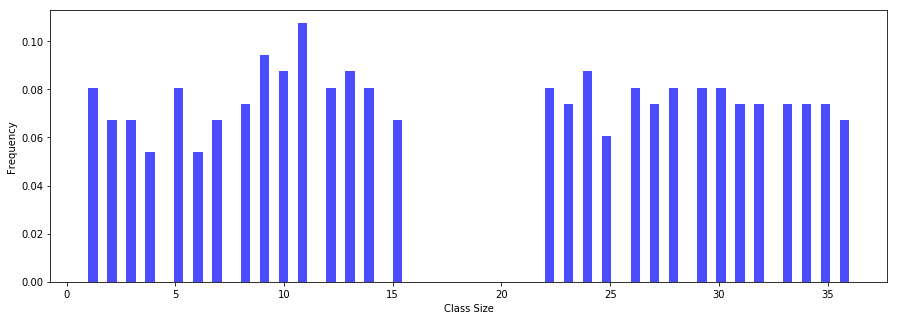

In [45]:
plt.figure(2, figsize = (15,5))

plt.subplot(1,1,1)

num_bin1 = 80

plt.hist(leafdata['Class (Species)'], num_bin1, density = 1, facecolor = 'blue', alpha = 0.7)
plt.xlabel('Class Size')
plt.ylabel('Frequency')

plt.show()

<font color=green>The differences between the values are not so extreme so I'll consider the dataset balance.<font>

#### Using a scatter plot, what pattern can you see? Why?

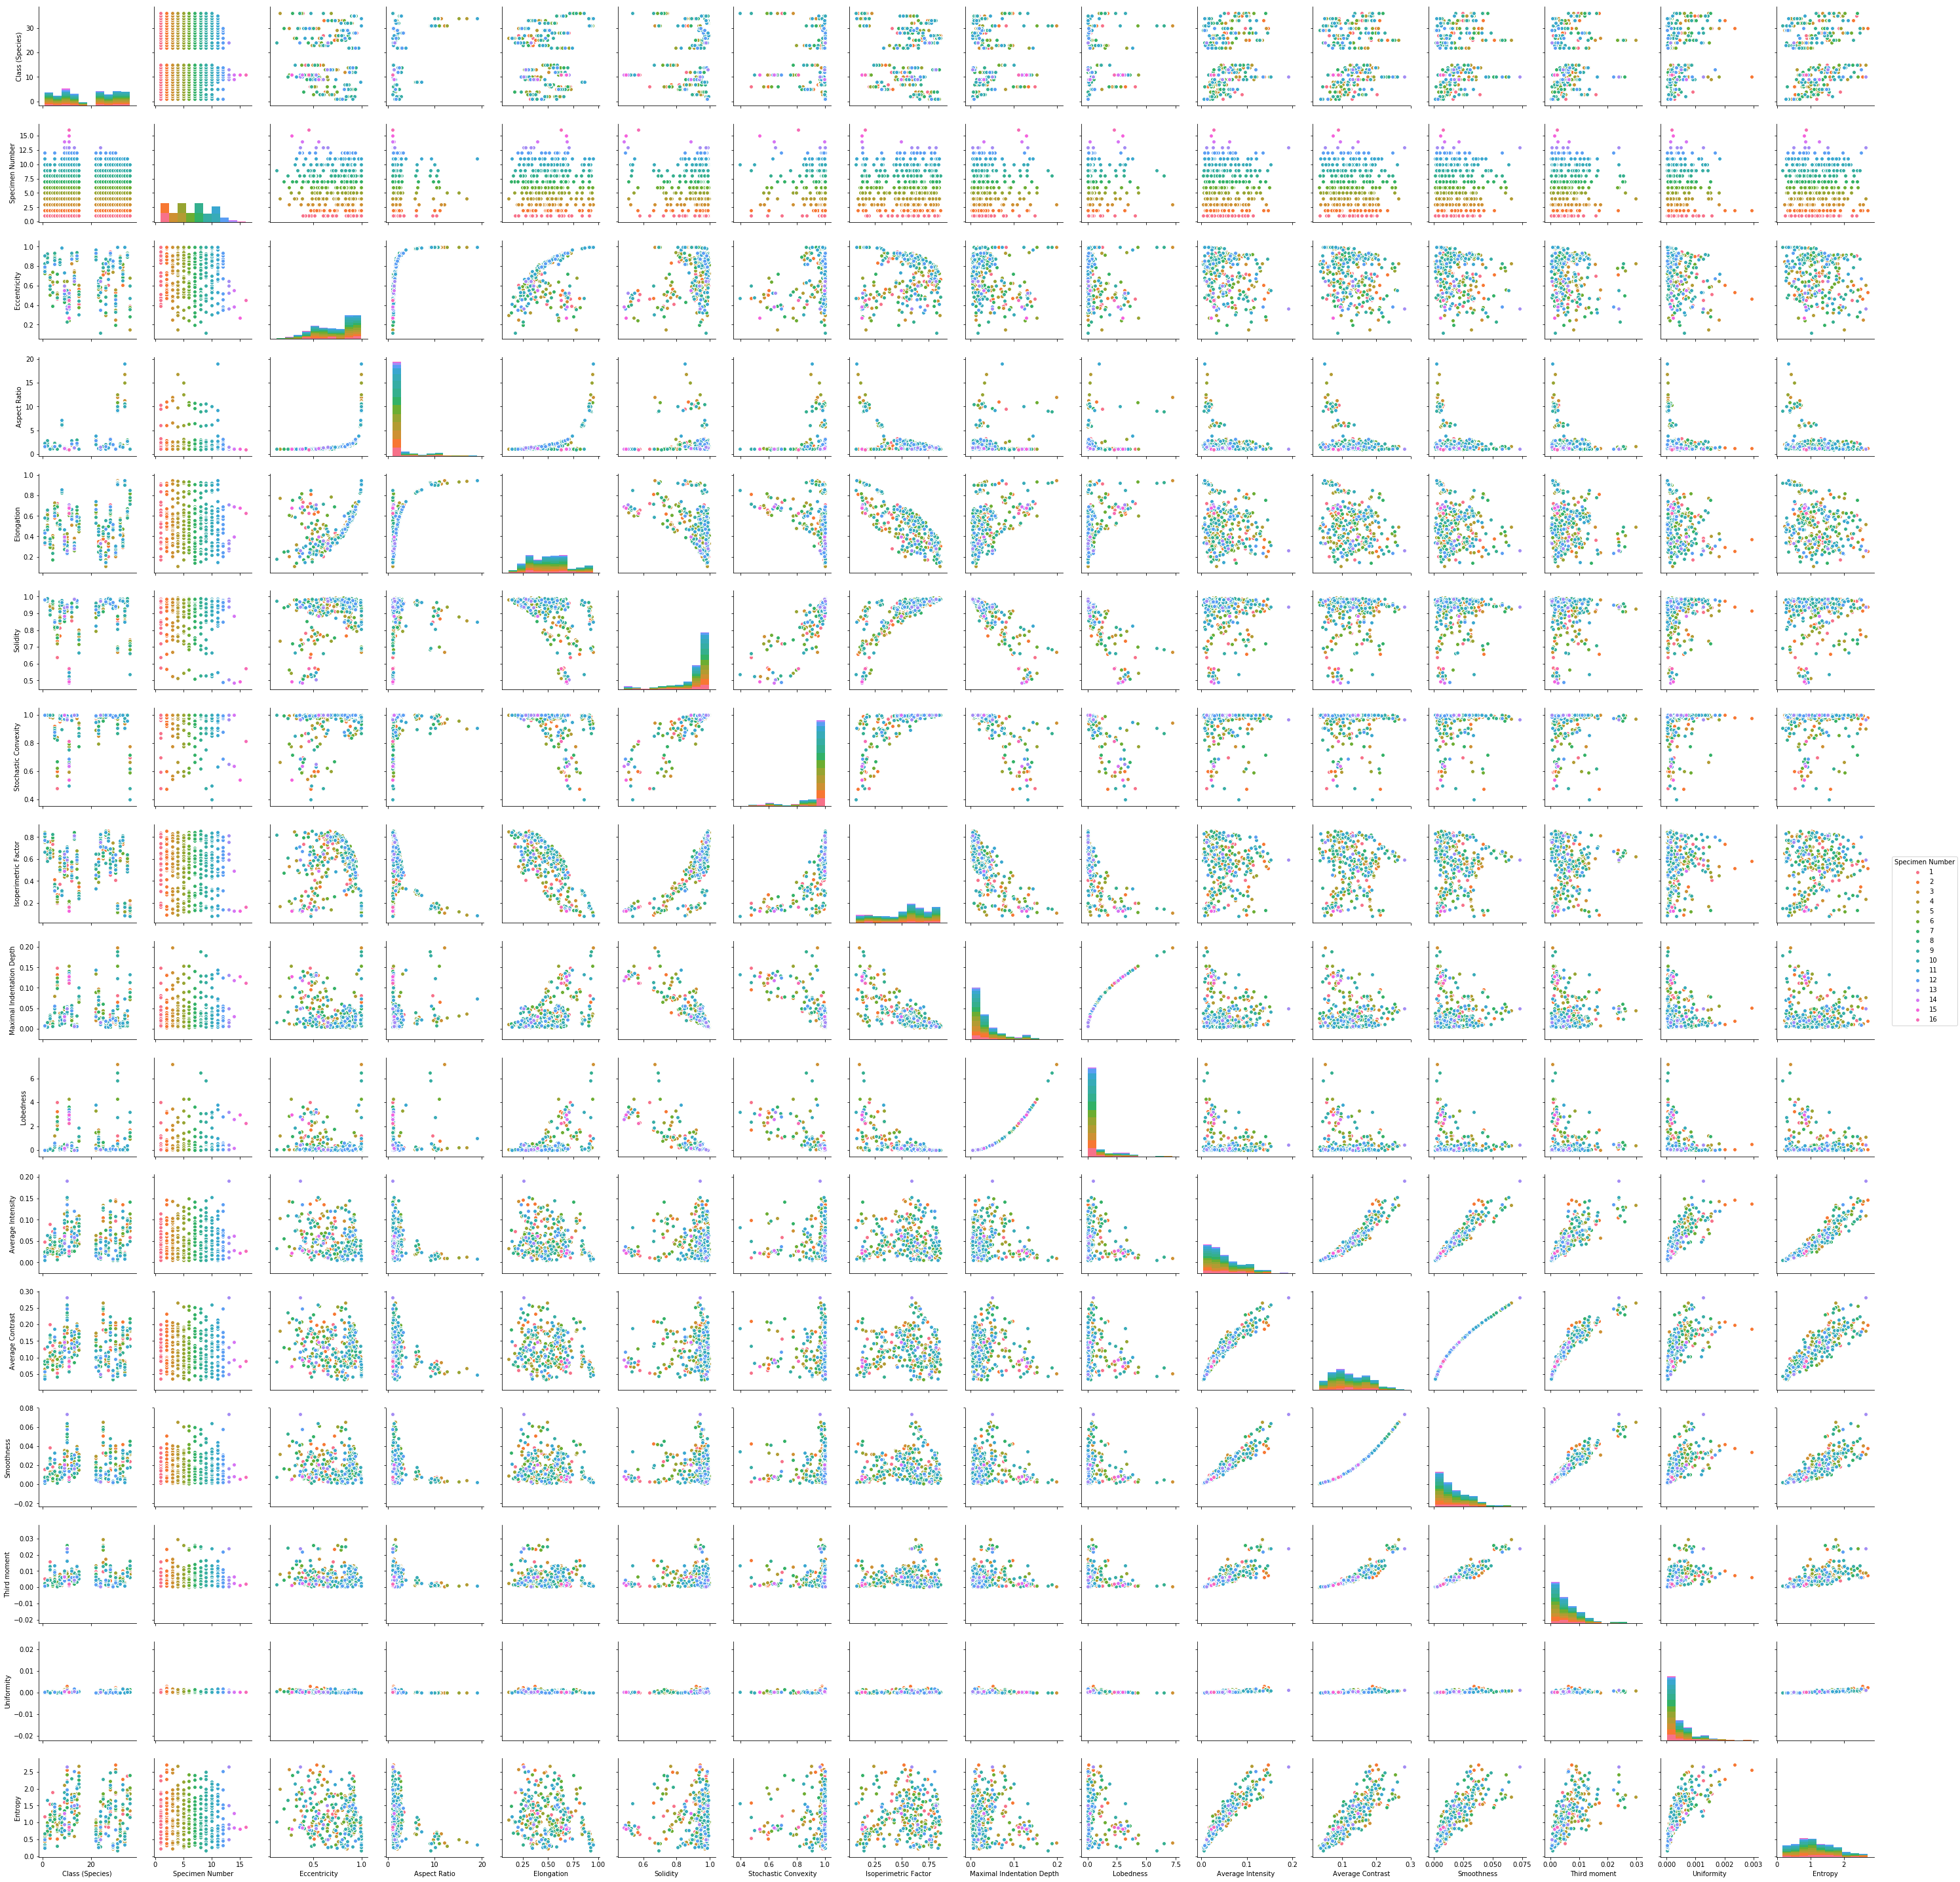

In [85]:
# Create the default pairplot
#sns.pairplot(leafdata)
sns.pairplot(leafdata, hue = 'Specimen Number')

<font color=green> There are linear and non-linear pattern shown in the scatter plot above. Scatterplots with a linear pattern have points that seem to generally fall along a line while nonlinear patterns seem to follow along some curve. Pattern that doesn't fit either of these two tell us that the two variables have no association with each other. 

For example, entropy shows a strong positive linear association with average intensity since as the value of the predictor increases, so does the value of the response. There's no clear pattern in entropy vs specimen number showing there's no association between the two variables as specimen number is just a categorical data.</font>

In [84]:

# sns.pairplot(leafdata, hue = 'Specimen Number', diag_kind = 'kde',
#              plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
#              size = 4)

#### What attribute is useful and what is not? Why?

<font color=green>'Specimen Number' is not a useful attribute as it's a categorical data which only function to inform us which specimen number of the leaf is used in the rows although they're in numerical values. There are 16 specimen number.<font>

# <font color=red>Question 2</font>

#### Experiment with Naive Bayes classifier. Use default parameter configurations. Do data split and cross-validation as necessary. In addition, apply KNN and Decision Tree classifiers on the same data using their default parameter.

#### Compare their accuracy. How much they differ between each other?
#### Why does their performance (accuracy) differ? Explain using any of the evaluation metrices (i.e. confusion matrix, precision, recall, etc.)

#### <font color=blue> Naive Bayes</font>

In [10]:
# Select specific/related features
feature_cols =[
    "Eccentricity",
    "Aspect Ratio",
    "Elongation",
    "Solidity",
    "Stochastic Convexity",
    "Isoperimetric Factor",
    "Isoperimetric Factor",
    "Lobedness",
    "Average Intensity",
    "Average Contrast",
    "Smoothness",
    "Third moment",
    "Uniformity",
    "Entropy",
]

x = leafdata[feature_cols] 
y = leafdata["Class (Species)"]
print(y)
# Split dataset in training and test datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)
# Instantiate the classifier
gnb = GaussianNB()

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
310    34
311    34
312    34
313    34
314    34
315    34
316    34
317    34
318    34
319    35
320    35
321    35
322    35
323    35
324    35
325    35
326    35
327    35
328    35
329    35
330    36
331    36
332    36
333    36
334    36
335    36
336    36
337    36
338    36
339    36
Name: Class (Species), Length: 340, dtype: int64


Number of mislabeled points out of a total 136 points : 46, performance 66.18%


Text(0.5,69,'Predicted label')

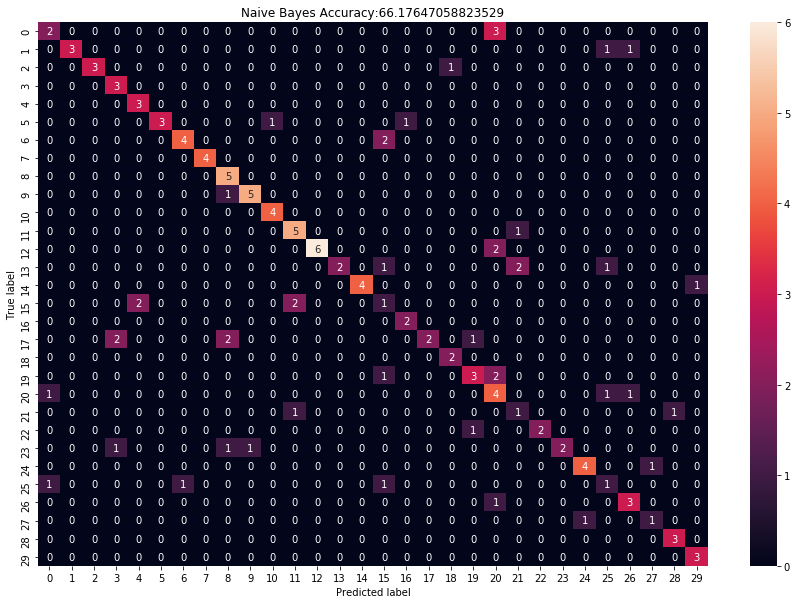

In [11]:
# Train classifier
gnb.fit(x_train,y_train)
# Test the classifier
predict_bayes = gnb.predict(x_test)
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(x_test.shape[0], (y_test != predict_bayes).sum(),
              gnb.score(x_test,y_test)*100 ))
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict_bayes)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [201]:
scores =[]
NB_credit = GaussianNB()
score = cross_val_score(gnb, x_train, y_train, cv = 3, scoring = 'accuracy') # Use the outside folds
scores.append(score.mean())

print("The optimal score is %.3f" % max(scores))

print('Mean performance metric = %.3f' % np.mean(score))
#print('SDT of the metric       = %4.3f' % np.std(score))
print('Outcomes by cv fold')
for i, z in enumerate(score):
    print('Fold %2d    %4.3f' % (i+1, z))

The optimal score is 0.670
Mean performance metric = 0.670
Outcomes by cv fold
Fold  1    0.623
Fold  2    0.697
Fold  3    0.689


In [13]:
score = cross_val_score(NB_credit, x_train, y_train, cv=3, scoring='accuracy')
scores.append(score.mean())
    
print("The optimal score is %.4f" % max(scores))

The optimal score is 0.6696


In [14]:
print(classification_report(y_test, predict_bayes))

             precision    recall  f1-score   support

          1       0.50      0.40      0.44         5
          2       1.00      0.60      0.75         5
          3       1.00      0.75      0.86         4
          4       0.50      1.00      0.67         3
          5       0.60      1.00      0.75         3
          6       1.00      0.60      0.75         5
          7       0.80      0.67      0.73         6
          8       1.00      1.00      1.00         4
          9       0.56      1.00      0.71         5
         10       0.83      0.83      0.83         6
         11       0.80      1.00      0.89         4
         12       0.62      0.83      0.71         6
         13       1.00      0.75      0.86         8
         14       1.00      0.33      0.50         6
         15       1.00      0.80      0.89         5
         22       0.17      0.20      0.18         5
         23       0.67      1.00      0.80         2
         24       1.00      0.29      0.44   

#### <font color=blue> KNN</font>

In [146]:
x1=leafdata.iloc[:,2:16]
y1=leafdata.iloc[:,0]
labelencoder = LabelEncoder()
y1 = labelencoder.fit_transform(y1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.4,random_state=0)

sc=StandardScaler()
sc.fit_transform(x1_train,y1_train)
sc.fit(x1_test,y1_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

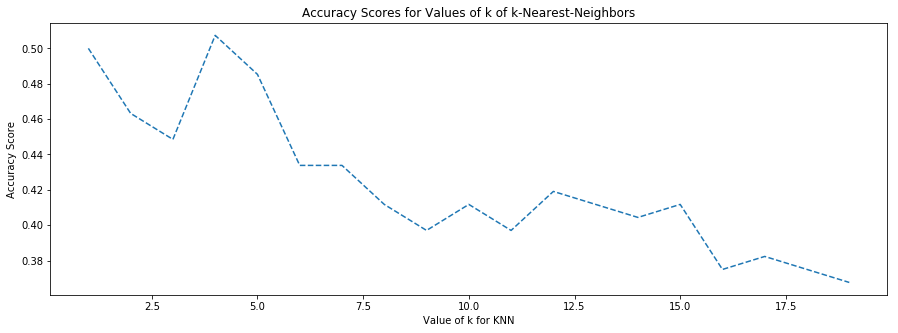

The prediction accuracy is: 36.76%


In [202]:
#empty variable for storing the KNN metrics
scores=[]
lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k)
    #input the train data to train KNN
    knn.fit(x1_train,y1_train)
    y_pred=knn.predict(x1_test)
    scores.append(metrics.accuracy_score(y1_test,y_pred))

plt.figure(2,figsize=(15,5))
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
print("The prediction accuracy is: {0:2.2f}{1:s}".format(knn.score(x1_test,y1_test)*100,"%"))

#### <font color=blue> Decision Tree</font>

In [152]:
x2=leafdata.iloc[:,2:16]
y2=leafdata.iloc[:,0]
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.4,random_state=0)

Text(0.5,69,'Predicted label')

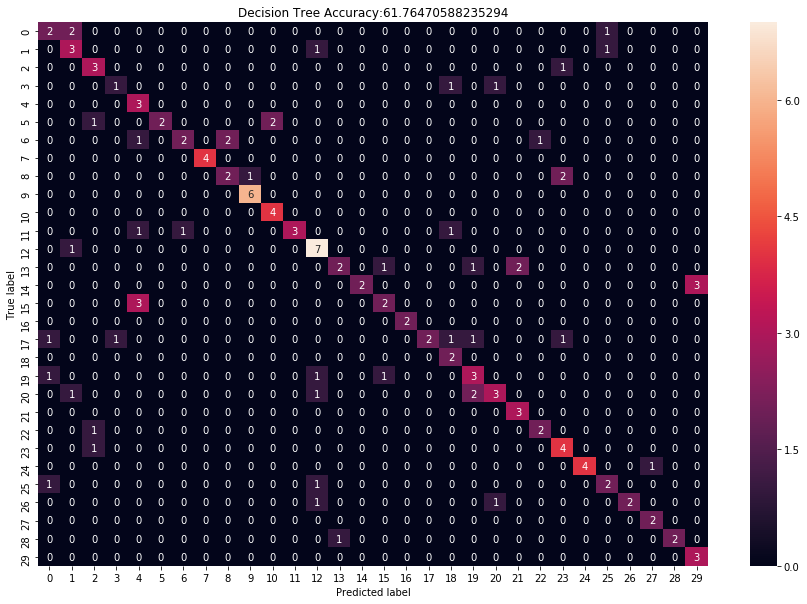

In [195]:
# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(criterion = 'entropy').fit(x2_train, y2_train)
# predict the classes of new, unseen data
predict_tree = dtree.predict(x2_test)
# Creates a confusion matrix
cm2 = confusion_matrix(y2_test, predict_tree)
cm_df2 = pd.DataFrame(cm2)

# plot the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
#sns.heatmap(cm_df2, annot=True)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x2_test,y2_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

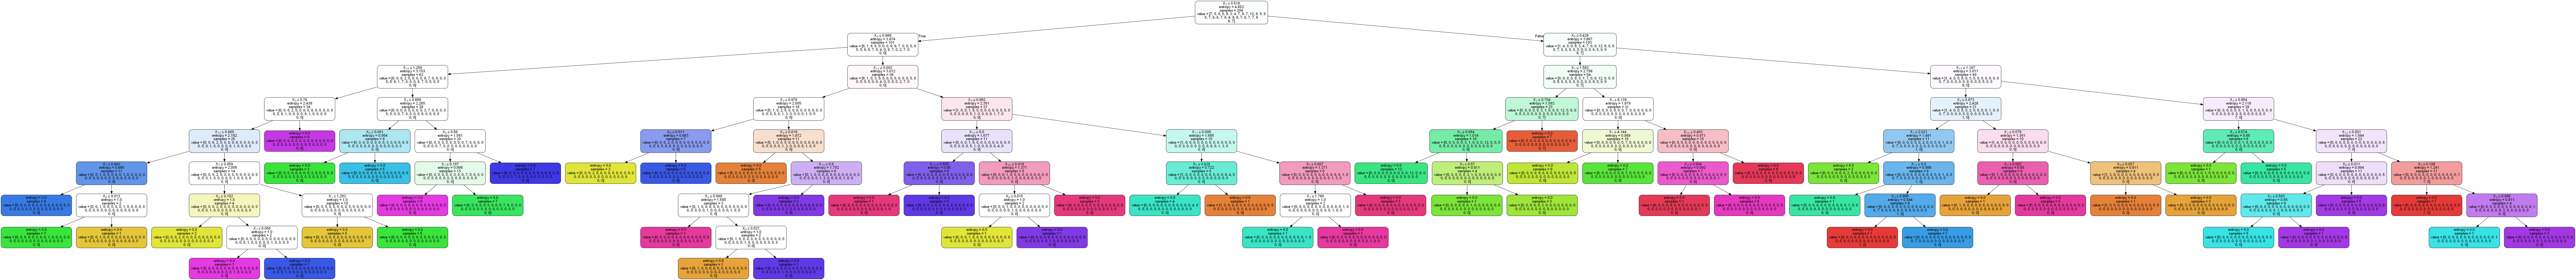

In [194]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [198]:
print(classification_report(y2_test, predict_tree))

             precision    recall  f1-score   support

          1       0.40      0.40      0.40         5
          2       0.43      0.60      0.50         5
          3       0.50      0.75      0.60         4
          4       0.50      0.33      0.40         3
          5       0.38      1.00      0.55         3
          6       1.00      0.40      0.57         5
          7       0.67      0.33      0.44         6
          8       1.00      1.00      1.00         4
          9       0.50      0.40      0.44         5
         10       0.86      1.00      0.92         6
         11       0.67      1.00      0.80         4
         12       1.00      0.50      0.67         6
         13       0.58      0.88      0.70         8
         14       0.67      0.33      0.44         6
         15       1.00      0.40      0.57         5
         22       0.50      0.40      0.44         5
         23       1.00      1.00      1.00         2
         24       1.00      0.29      0.44   

<font color=green>Accuracy comparison (%):
<br>Naive Bayes: 66.18
<br>KNN: 36.76
<br>Decision Tree: 61.77

<br><br>Naive Bayes recorded the best performance perhaps because of the small amount of data and also caused by the zero-one loss function used in the classification. Zero-one loss is a common  loss function used with  classification learning. It assigns 0 to loss for a correct classification and 1 for an incorrect classification.</font>

Ref: <br>Frank, E., Trigg, L.E., Holmes, G., Witten, I.H.: Naive Bayes for regression (technical note). Machine Learning 41(1), 5–25 (2000)
<br>(2011) Zero-One Loss. In: Sammut C., Webb G.I. (eds) Encyclopedia of Machine Learning. Springer, Boston, MA
)